# Assignment 2 - Unsupervised Learning 

## Task 1 :

### 1. Data normalization 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
from sklearn.datasets import load_linnerud
df = load_linnerud()
X, y = df.data, df.target

In [3]:
X

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [4]:
df.target_names

['Weight', 'Waist', 'Pulse']

In [5]:
df.feature_names

['Chins', 'Situps', 'Jumps']

In [6]:
df = pd.DataFrame(data = X, columns = df.feature_names)

In [7]:
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


### Let's look at the distribution of the features

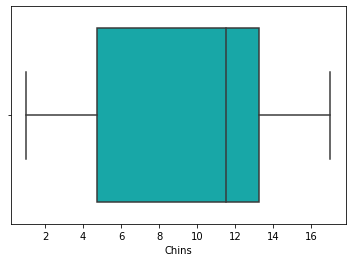

In [8]:
sns.boxplot(df['Chins'], color = 'c')

Chins feature is negatively skewed(skewed left) which means that more values are concentrated on the right side of the distribution.

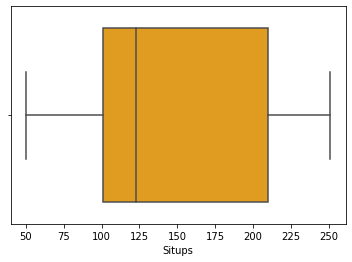

In [9]:
sns.boxplot(df['Situps'], color = 'orange')

Situps feature is positively skewed(skewed right) which means that more values are concentrated on the left side of the distribution.

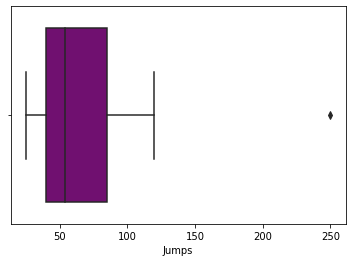

In [10]:
sns.boxplot(df['Jumps'], color = 'purple')

Jumps feature is skewed right. There is one extremely high outlier.

### Data Normalization

We need to do data scaling since the features have different ranges.

Chins feature has a range of 1-17, while Situps feature has 50-250 and Jumps has 10-120 approximately.

I will normalize the features using MinMaxScaler to help them all to be in the same range. I chose to use MinMaxScaler because there are not too many outliers in the distribution.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [12]:
# New dataframe with standardized values
df_scaled = pd.DataFrame(data = df_scaled, columns = df.columns)

### Probability Density of Original and Normalized Features

Text(0.5, 1.0, 'Original Probability Density of Chins')

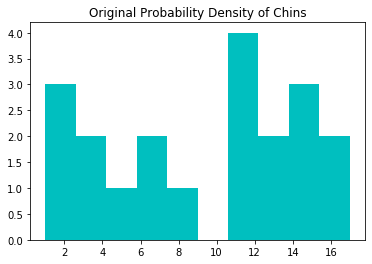

In [13]:
plt.hist(df['Chins'], color = 'c')
plt.title('Original Probability Density of Chins')

Text(0.5, 1.0, 'Normalized Probability Density of Chins')

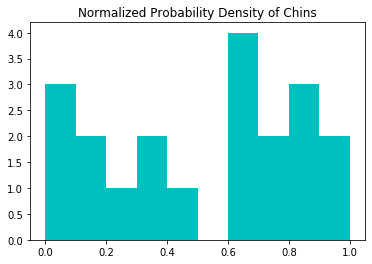

In [14]:
plt.hist(df_scaled['Chins'], color = 'c')
plt.title('Normalized Probability Density of Chins')

Text(0.5, 1.0, 'Probability Density of Original Jumps')

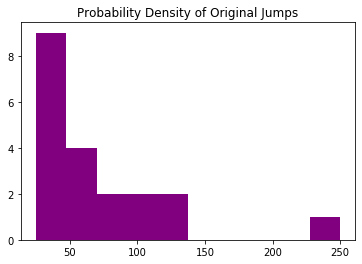

In [15]:
plt.hist(df['Jumps'], color = 'purple')
plt.title('Probability Density of Original Jumps')

Text(0.5, 1.0, 'Probability Density of Normalized Jumps')

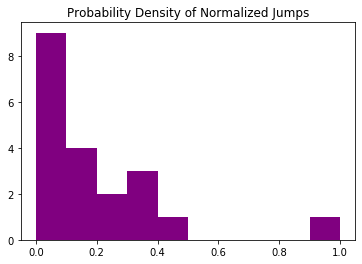

In [16]:
plt.hist(df_scaled['Jumps'], color = 'purple')
plt.title('Probability Density of Normalized Jumps')

Text(0.5, 1.0, 'Probability Density of Original Situps')

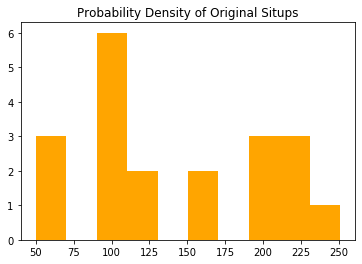

In [17]:
plt.hist(df['Situps'], color = 'orange')
plt.title('Probability Density of Original Situps')

Text(0.5, 1.0, 'Probability Density of Normalized Situps')

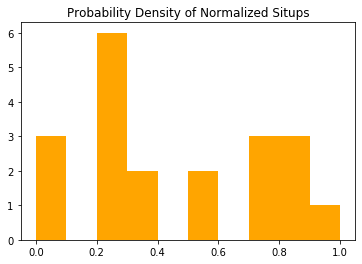

In [18]:
plt.hist(df_scaled['Situps'], color = 'orange')
plt.title('Probability Density of Normalized Situps')

As we can see from the plots, normalization does not change the shape of the distribution, but rescales the data.

## Task 2 :

### 2. Dimensionality reduction

In [19]:
# Importing the dataset
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train')
X = data['data']
y = data['target']

In [20]:
# Using KernelPCA to reduce the dimensionality
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)

In [21]:
X_pca.shape

(11314, 2)

In [22]:
pca10 = KernelPCA(n_components = 10)
pca10.fit(X)
X_pca10 = pca10.transform(X)

In [23]:
X_pca10.shape

(11314, 10)

Text(0, 0.5, 'Second principal component')

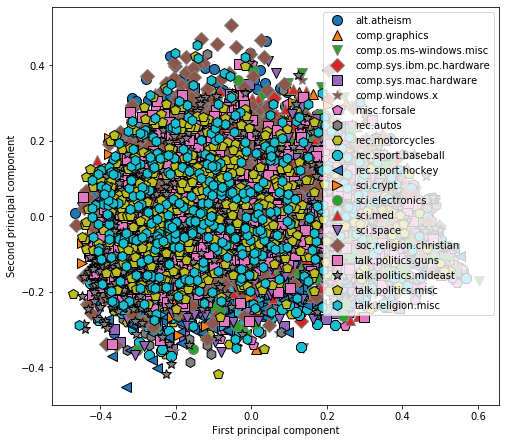

In [24]:
import mglearn
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], data.target)
plt.legend(data.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X_pca, y, stratify=y, random_state=0)
# build a KNeighborsClassifier using 50 neighbors
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.11


In [26]:
# Checking the score with 10 dimensions.

X_train, X_test, y_train, y_test = train_test_split(
X_pca10, y, stratify=y, random_state=0)
# build a KNeighborsClassifier using 50 neighbors
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.20


The change of number of dimensions from 1 to 10 increased the test score.

## Task 3 :

### 3. Clustering

#### Cluster 20 News Dataset into 20 clusters.

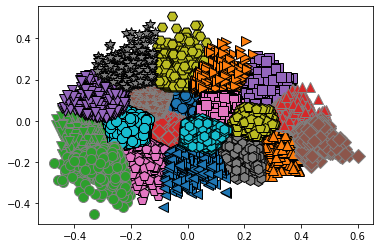

In [27]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters = 20)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)
assignments_pca = kmeans_pca.labels_

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], assignments_pca)

Text(0, 0.5, 'Feature 1')

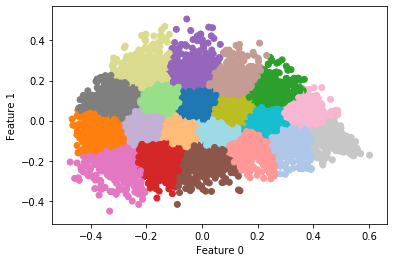

In [31]:
# plot the cluster assignments and cluster centers
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='tab20')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
marker='^', c = range(0, 20), s=100, linewidth=2, cmap='tab20')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

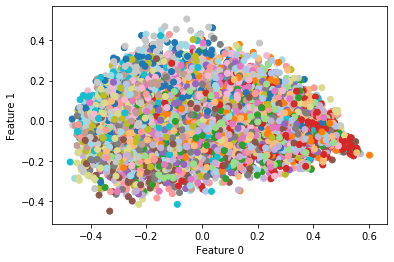

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab20')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")